In [1]:
import sys
import os
from IPython.display import display
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from magine.plotting.wordcloud_tools import create_wordcloud
from magine.plotting.venn_diagram_maker import create_venn3
from magine.enrichment import load_enrichment_csv
from magine.enrichment.enrichr import get_background_list, Enrichr

In [42]:
f_name = 'drug_pertubations_from_geo_up.csv'
e_filename = 'compare_drug_dbs.csv'

df = pd.DataFrame(
    get_background_list('Drug_Perturbations_from_GEO_up'), 
    columns=['term', 'gene_list', 'n_genes']
)

df['drug'] = df.term.str.split(' ').str.get(0)
df.gene_list = df.gene_list.str.join('|')

In [51]:
def sample_6907():    
    file_name = 'gse6907_enrichment.csv'
    if os.path.exists(file_name):
        return load_enrichment_csv(file_name)
    else:
        subset_gse_6907 = df[df['term'].str.contains('gse6907')].copy()

        terms, gene_sets = [], []

        for t in subset_gse_6907.to_dict('records'):
            terms.append(t['term'].split(' ')[0])
            gene_sets.append(t['gene_list'].split('|'))
            
        enrichment = e.run_samples(gene_sets, terms, database='Reactome_2016')
        enrichment.to_csv(file_name, encoding='utf8')
    return enrichment

In [52]:
gse_data = sample_6907()
gse_data.filter_multi(combined_score=0, inplace=True)

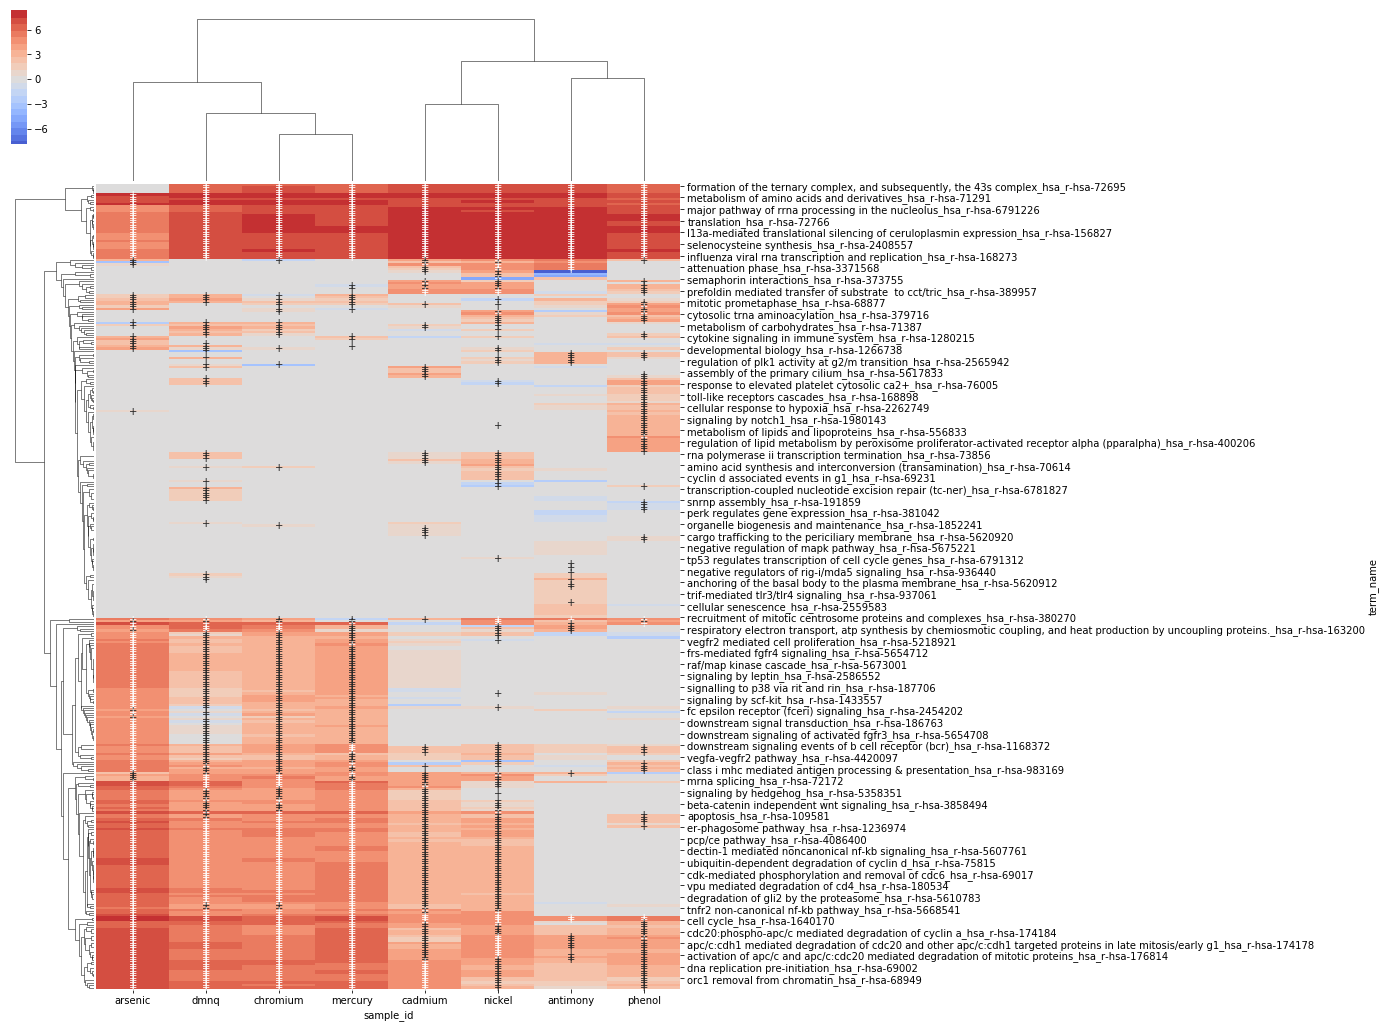

In [53]:
fig = gse_data.heatmap(
    convert_to_log=True, 
    cluster_col=True, 
    cluster_row=True,
    figsize=(12, 18)
)

Number of rows went from 1560 to 304
Number of rows went from 304 to 119


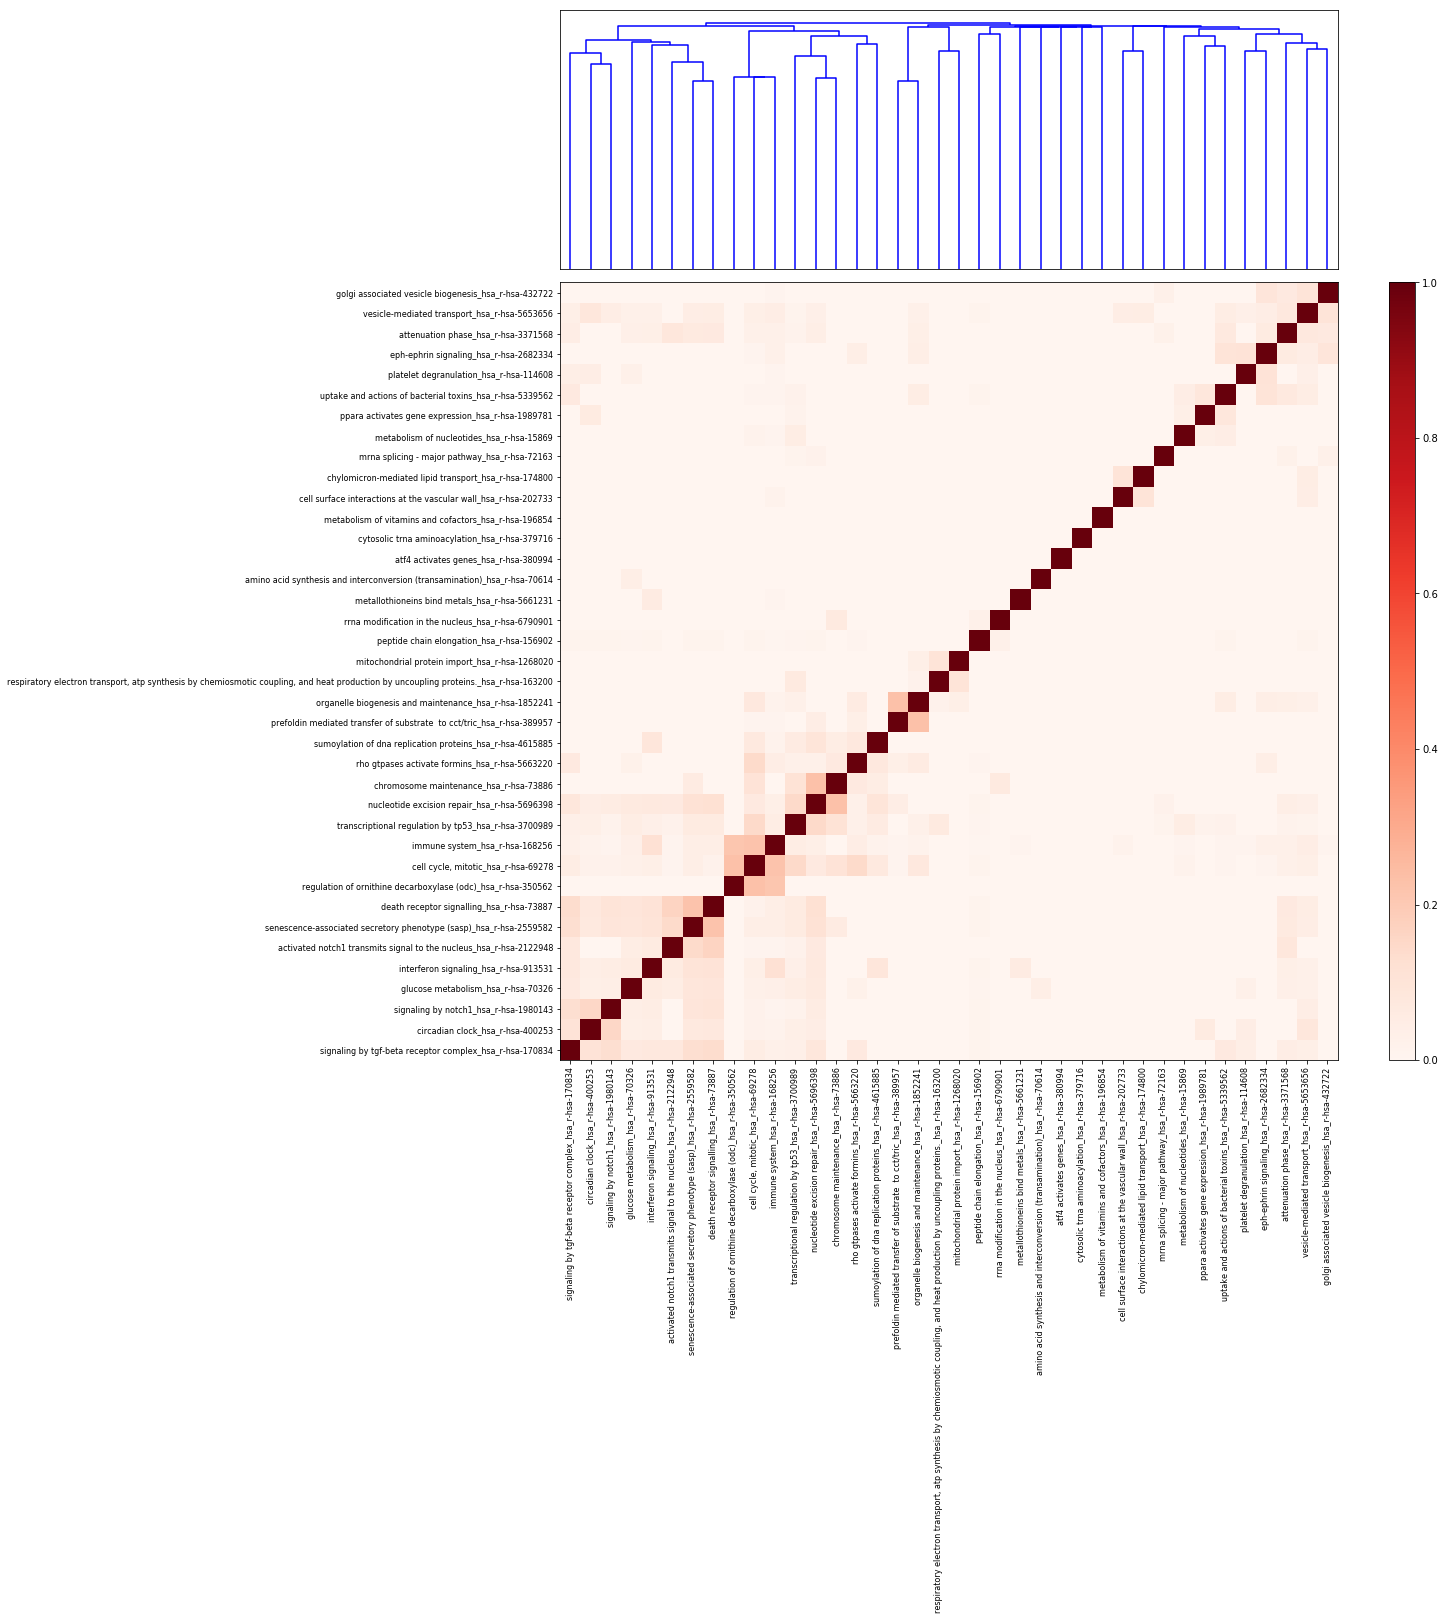

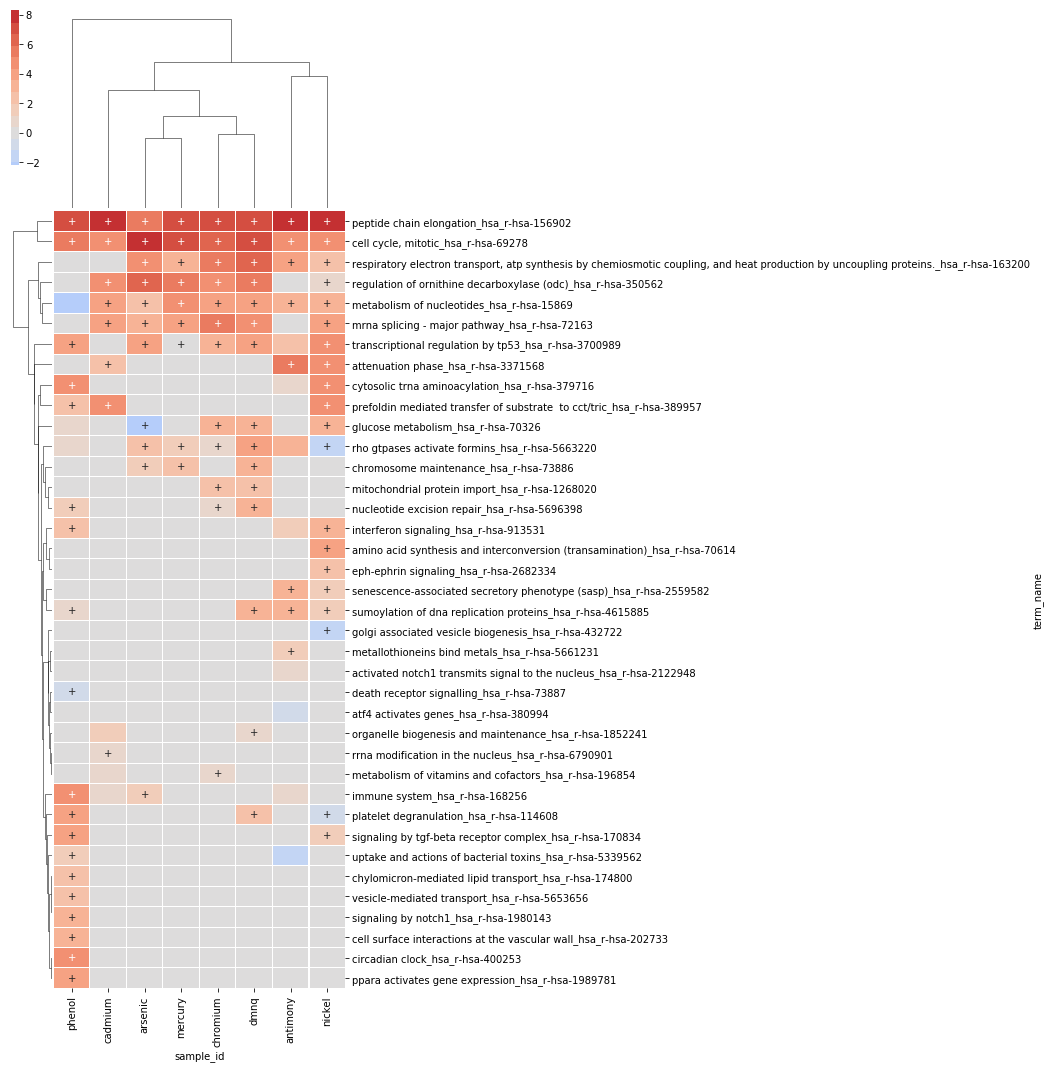

In [54]:
gse_data.remove_redundant(level='sample', threshold=.25, inplace=True)
gse_data.remove_redundant(level='dataframe', threshold=.25, inplace=True)

gse_data.dist_matrix(figsize=(18, 18), );

fig = gse_data.heatmap(
    convert_to_log=True, 
    cluster_col=True, 
    cluster_row=True,
    figsize=(6, 18), 
    linewidths=0.01
)